This file contains an analysis of DBASCAN cluster's variance and size distribution 
- Analaysis performed for 1 epsilon
- Analysis performed under several epsilon
- Analysis performed under several epsilon, only anlyzing clusters containing consecutive hours

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import os
import math
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

## Load input data

In [2]:
path = r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\system"

In [3]:
p_demand = "Demand_data.csv"
p_fuel = "Fuels_data.csv"
p_CF = "Generators_variability.csv"

path_demand = os.path.join(path, p_demand)
path_fuel = os.path.join(path, p_fuel)
path_CF = os.path.join(path, p_CF)

df_demand = pd.read_csv(path_demand)
df_fuel = pd.read_csv(path_fuel)
df_CF = pd.read_csv(path_CF)

In [4]:
zones_name = ["ME", "MA", "CT"]
zones_numbers = ["z1", "z2", "z3"]
df_tot = pd.DataFrame()

for i in range (len(zones_name)):
    df_name = "df_" + zones_name[i]
    df_Z1 = df_demand.loc[:,list(df_demand.filter(like=zones_numbers[i]).columns)]
    df_f_z= df_fuel.loc[1:, df_fuel.filter(like=zones_name[i]).columns].reset_index(drop=True)
    df_tot = pd.concat([df_tot, df_Z1, df_CF.loc[:, df_CF.columns.str.startswith(zones_name[i])], df_f_z], axis=1)

df_tot['Time_Index'] = df_tot.index +1 

# DBSCAN 

## DBSCAN: with several epsilons

In [5]:
zones_name = ["ME", "MA", "CT"]
zones_numbers = ["z1", "z2", "z3"]
df_tot = pd.DataFrame()

for i in range (len(zones_name)):
    df_name = "df_" + zones_name[i]
    df_Z1 = df_demand.loc[:,list(df_demand.filter(like=zones_numbers[i]).columns)]
    df_f_z= df_fuel.loc[1:, df_fuel.filter(like=zones_name[i]).columns].reset_index(drop=True)
    df_tot = pd.concat([df_tot, df_Z1, df_CF.loc[:, df_CF.columns.str.startswith(zones_name[i])], df_f_z], axis=1)

df_tot['Time_Index'] = df_tot.index +1
df_tot["Rel_TimeStep"] = 1 

In [6]:
p_demand = "Demand_data.csv"
p_fuel = "Fuels_data.csv"
p_CF = "Generators_variability.csv"

path_demand = os.path.join(path, p_demand)
path_fuel = os.path.join(path, p_fuel)
path_CF = os.path.join(path, p_CF)

df_demand = pd.read_csv(path_demand)
df_fuel = pd.read_csv(path_fuel)
df_CF = pd.read_csv(path_CF)

selected_demand_columns = [col for col in df_demand.columns if (col.startswith("Demand") or col == "Time_Index") and (col != "Demand_Segment")]
selected_fuel_columns = [col for col in df_fuel.columns if (col != "Time_Index") and (col!="None")]
selected_CF_columns = [col for col in df_CF.columns if (col != "Time_Index") and (col!="None")]


df_demand_values = df_demand[selected_demand_columns]
df_fuel_values = df_fuel[selected_fuel_columns].drop(index=0).reset_index()
df_CF_values = df_CF[selected_CF_columns]

df_tot = pd.concat([df_demand_values, df_fuel_values , df_CF_values], axis=1)
df_tot.head(3)

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3,index,CT_NG,ME_NG,MA_NG,MA_natural_gas_combined_cycle,MA_solar_pv,CT_natural_gas_combined_cycle,CT_onshore_wind,CT_solar_pv,ME_natural_gas_combined_cycle,ME_onshore_wind,MA_battery,CT_battery,ME_battery
0,1,7850,2242,1070,1,5.45,5.45,5.28,1,0.0,1,0.569945,0.0,1,0.920104,1,1,1
1,2,7424,2120,1012,2,5.45,5.45,5.28,1,0.0,1,0.623259,0.0,1,0.882234,1,1,1
2,3,7107,2029,969,3,5.45,5.45,5.28,1,0.0,1,0.694188,0.0,1,0.895074,1,1,1


In [7]:
# Normalize the data excluding the 'Time_Index' column
scaler = StandardScaler()
df_tot_normalized = scaler.fit_transform(df_tot.drop(columns=['Time_Index']))
df_tot_normalized_df = pd.DataFrame(df_tot_normalized, columns=df_tot.columns.drop('Time_Index'))
df_tot_norm_w_tindex = pd.concat([df_tot[['Time_Index']].reset_index(drop=True), df_tot_normalized_df], axis=1)

c:\Users\Diego\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Diego\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


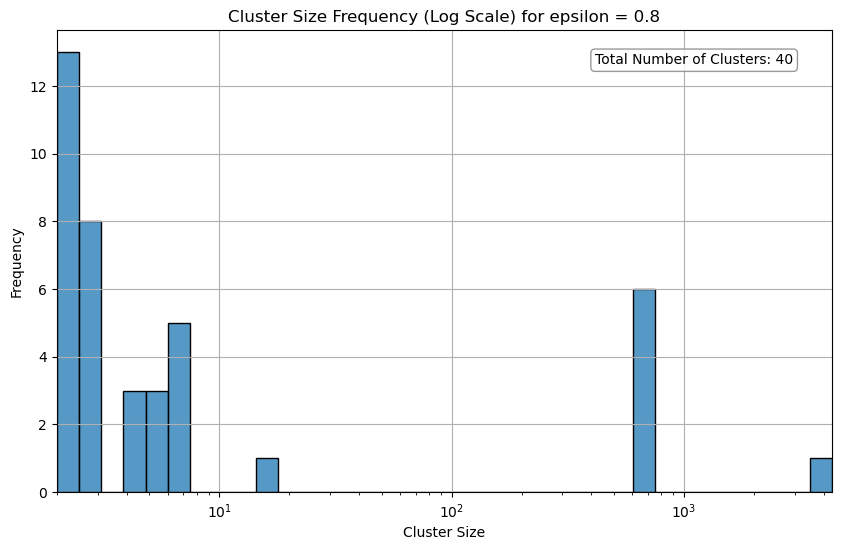

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


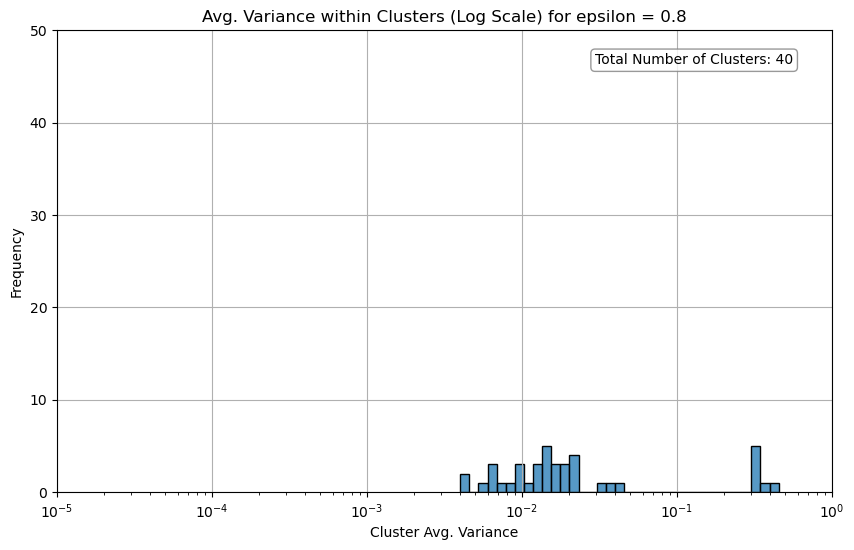

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


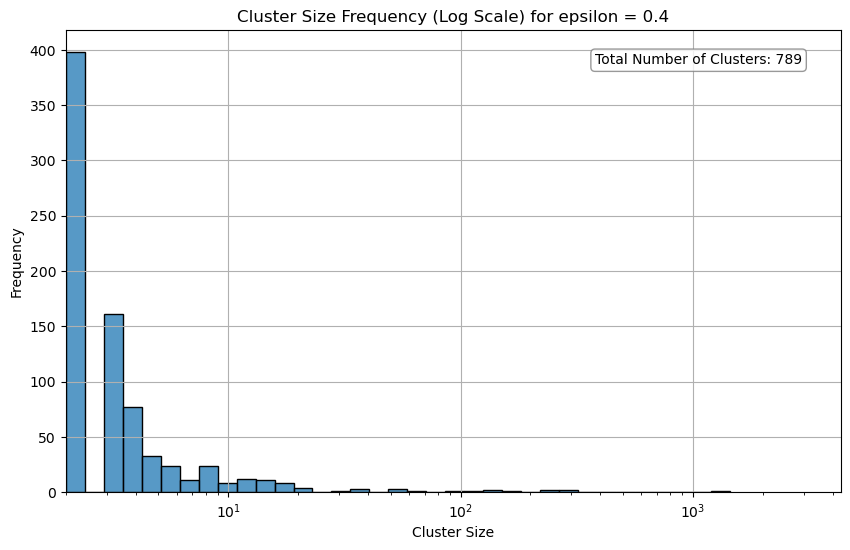

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


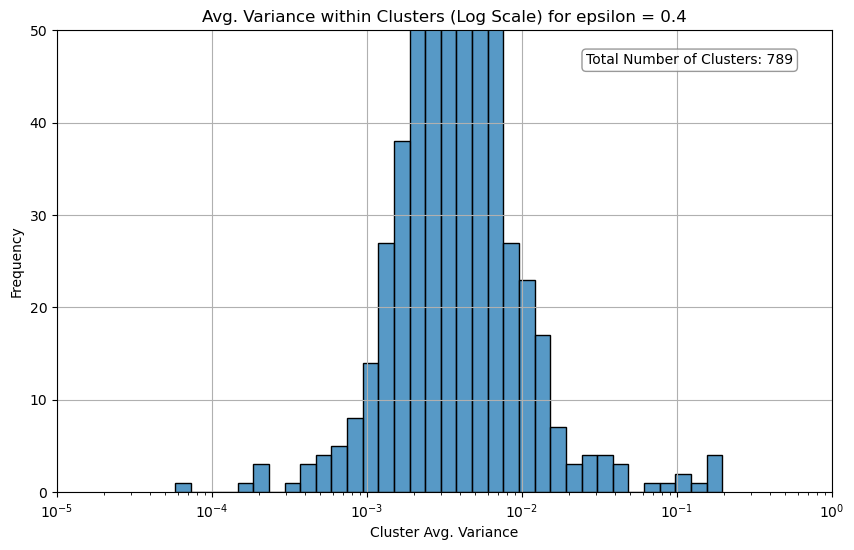

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


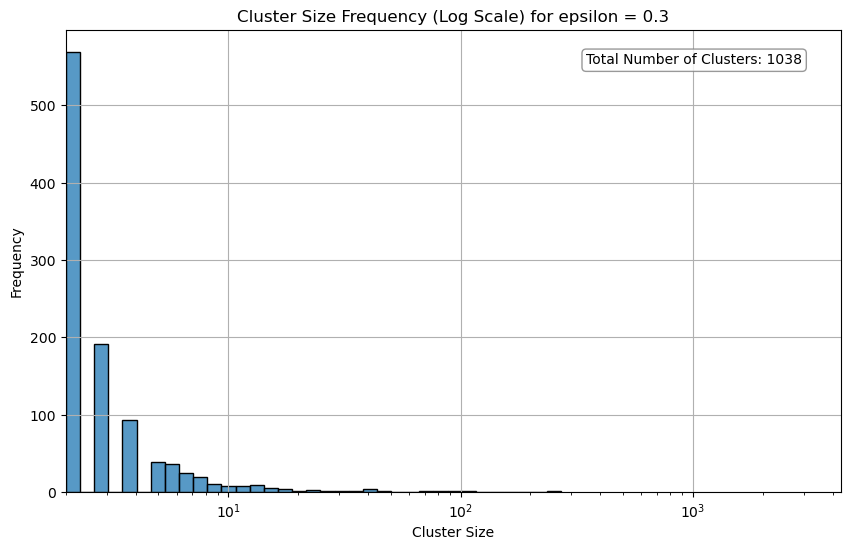

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


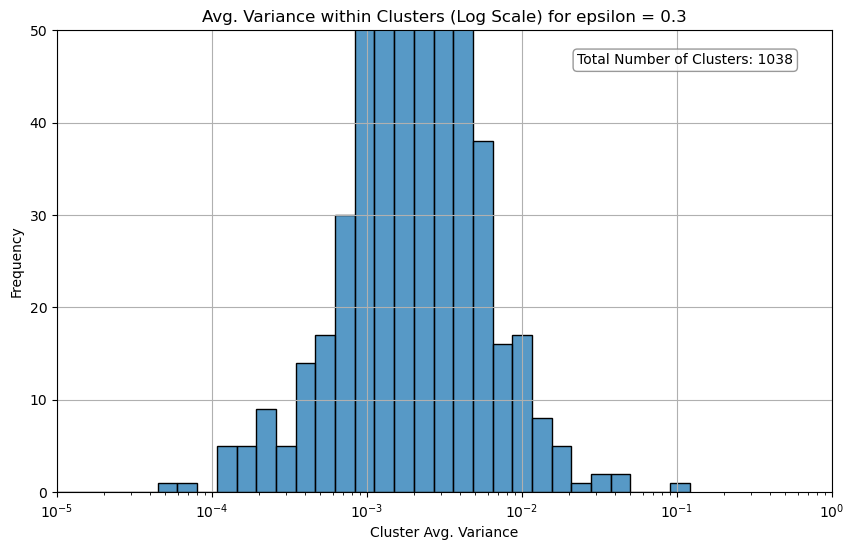

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


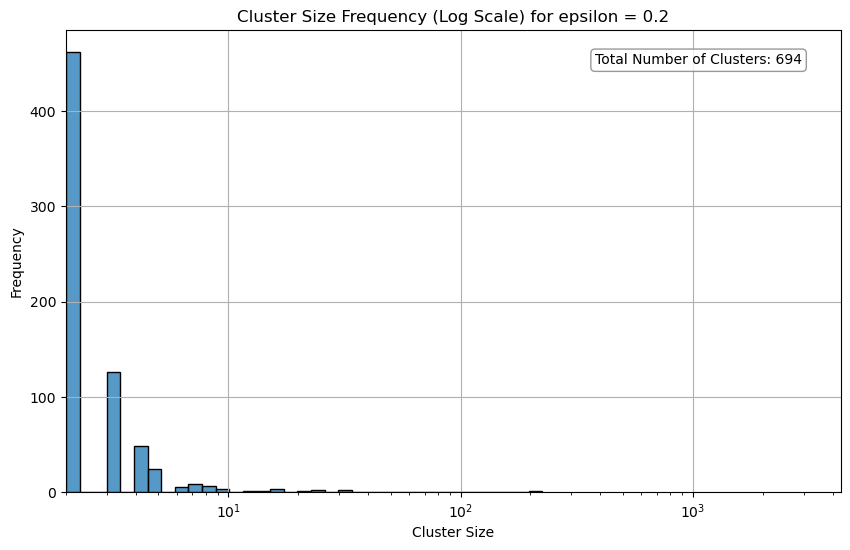

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


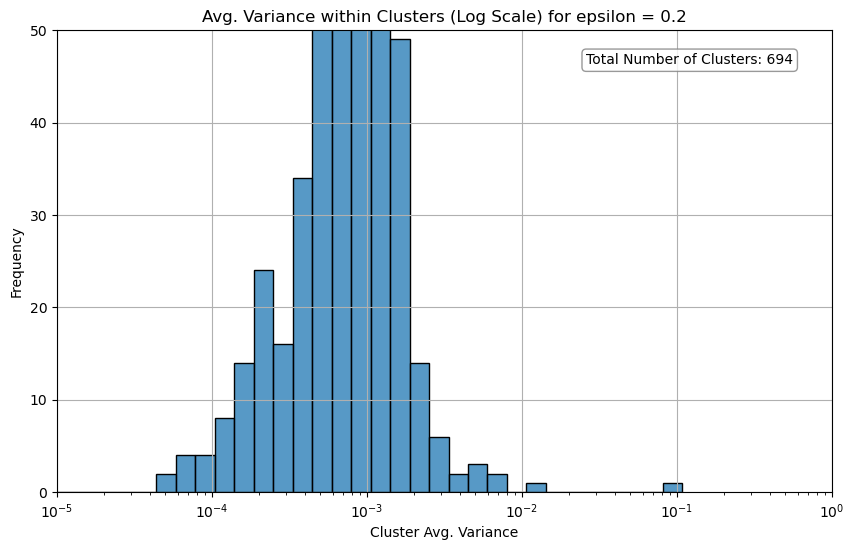

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


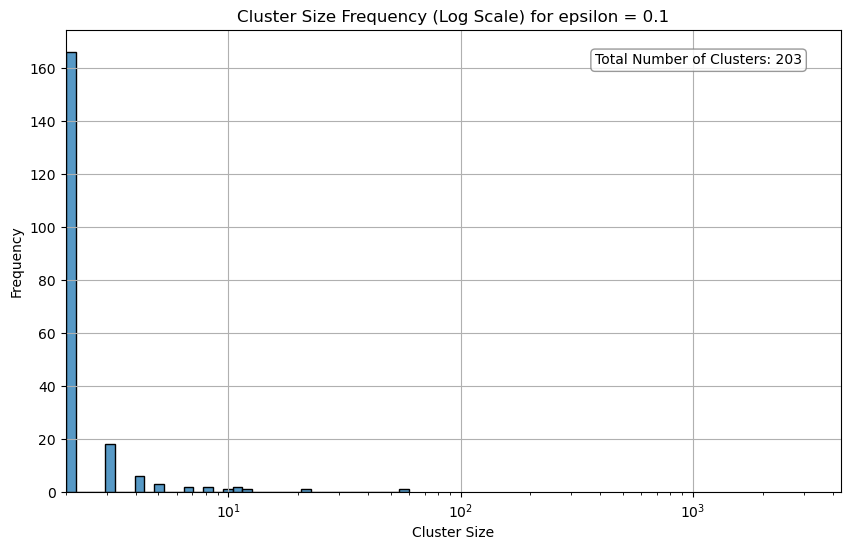

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


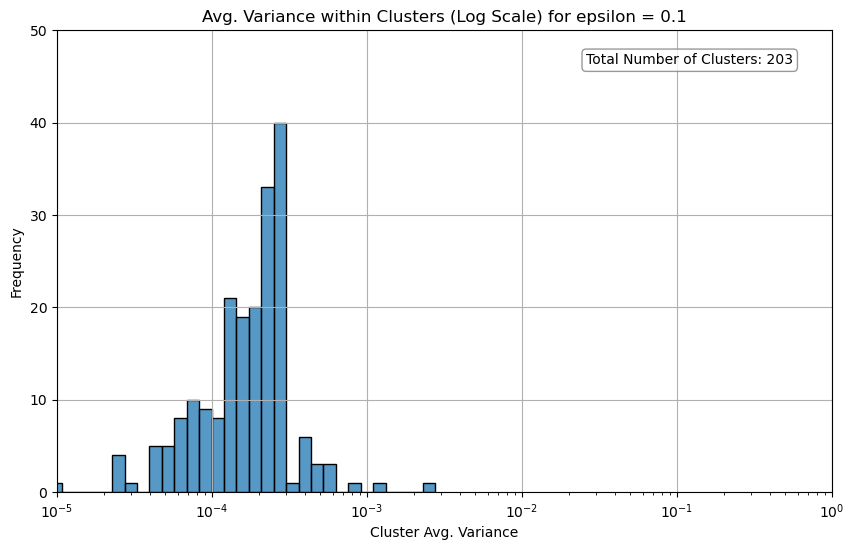

In [8]:
# Normalize the data excluding the 'Time_Index' column
scaler = StandardScaler()
df_tot_normalized = scaler.fit_transform(df_tot.drop(columns=['Time_Index']))
df_tot_normalized_df = pd.DataFrame(df_tot_normalized, columns=df_tot.columns.drop('Time_Index'))
df_tot_norm_w_tindex = pd.concat([df_tot[['Time_Index']].reset_index(drop=True), df_tot_normalized_df], axis=1)

# Initialize list to store results for each epsilon
epsilon_results = []

# Epsilon values to test
epsilon_values = [0.8, 0.4, 0.3, 0.2, 0.1]
df_tot_eps = {}

# First pass to find global axis limits for the x-axes
all_cluster_sizes = []
all_cluster_variances = []

for eps in epsilon_values:
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=2)
    labels = dbscan.fit_predict(df_tot_normalized)
    
    # Create a DataFrame to store clustering results for this epsilon
    df_epsilon = df_tot_normalized_df.copy()  # Exclude Time_Index for variance calculation
    df_epsilon['Cluster'] = labels

    #Save unnormalized data with clusters
    df_tot['Cluster'] = labels
    df_tot_eps[eps] = df_tot.copy()
    df_tot.drop(columns=['Cluster'], inplace=True)
    
    # Filter out outlier cluster (-1)
    clusters = df_epsilon[df_epsilon['Cluster'] != -1]['Cluster']
    
    # Collect cluster sizes and variance within each cluster
    cluster_sizes = clusters.value_counts()
    cluster_variances = df_epsilon[df_epsilon['Cluster'] != -1].groupby('Cluster').var().mean(axis=1)
    
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_variances.extend(cluster_variances)
    
    # Plot Cluster Size Frequency
    plt.figure(figsize=(10, 6))
    sns.histplot(cluster_sizes, kde=False, bins=35, log_scale=(True, False))
    plt.title(f'Cluster Size Frequency (Log Scale) for epsilon = {eps}')
    plt.xlabel('Cluster Size')
    plt.ylabel('Frequency')
    plt.xlim(min(all_cluster_sizes), max(all_cluster_sizes))
    plt.grid(True)
    total_clusters = len(cluster_sizes)
    plt.text(
        0.95, 0.95,
        f'Total Number of Clusters: {total_clusters}',
        transform=plt.gca().transAxes,
        fontsize=10,
        color='black',
        ha='right',
        va='top',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.8)
    )
    plt.show()
    
    # Plot Cluster Variance Frequency
    plt.figure(figsize=(10, 6))
    sns.histplot(cluster_variances, kde=False, bins=35, log_scale=(True, False))
    plt.title(f'Avg. Variance within Clusters (Log Scale) for epsilon = {eps}')
    plt.xlabel('Cluster Avg. Variance')
    plt.ylabel('Frequency')
    plt.xlim(1e-5, 1e-0)
    plt.ylim(0, 50)
    plt.grid(True)
    total_clusters = len(cluster_sizes)
    plt.text(
        0.95, 0.95,
        f'Total Number of Clusters: {total_clusters}',
        transform=plt.gca().transAxes,
        fontsize=10,
        color='black',
        ha='right',
        va='top',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.8)
    )
    plt.show()
    
    # Store the results for each epsilon
    result = {
        'Epsilon': eps,
        'Num_Clusters': len(cluster_sizes),
        'Median_Cluster_Size': cluster_sizes.median()
    }
    epsilon_results.append(result)

Text(0, 0.5, 'Num_Clusters')

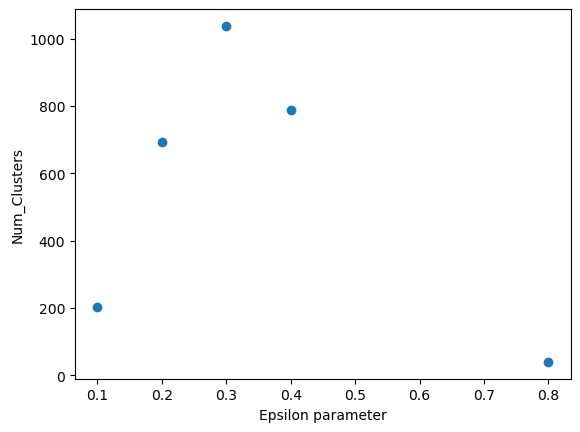

In [9]:
# Create a DataFrame to display the summary results for each epsilon
epsilon_df = pd.DataFrame(epsilon_results)
epsilon_df 

fig, ax = plt.subplots()
ax.scatter(epsilon_df["Epsilon"], epsilon_df["Num_Clusters"])
ax.set_xlabel("Epsilon parameter")
ax.set_ylabel("Num_Clusters")

In [10]:
epsilon_df

,Epsilon,Num_Clusters,Median_Cluster_Size
0,0.8,40,3.0
1,0.4,789,2.0
2,0.3,1038,2.0
3,0.2,694,2.0
4,0.1,203,2.0



# DBSCAN performed along several epsilons, analysing clusters containing consecutive hours
epsilon_df = pd.DataFrame(epsilon_results)

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

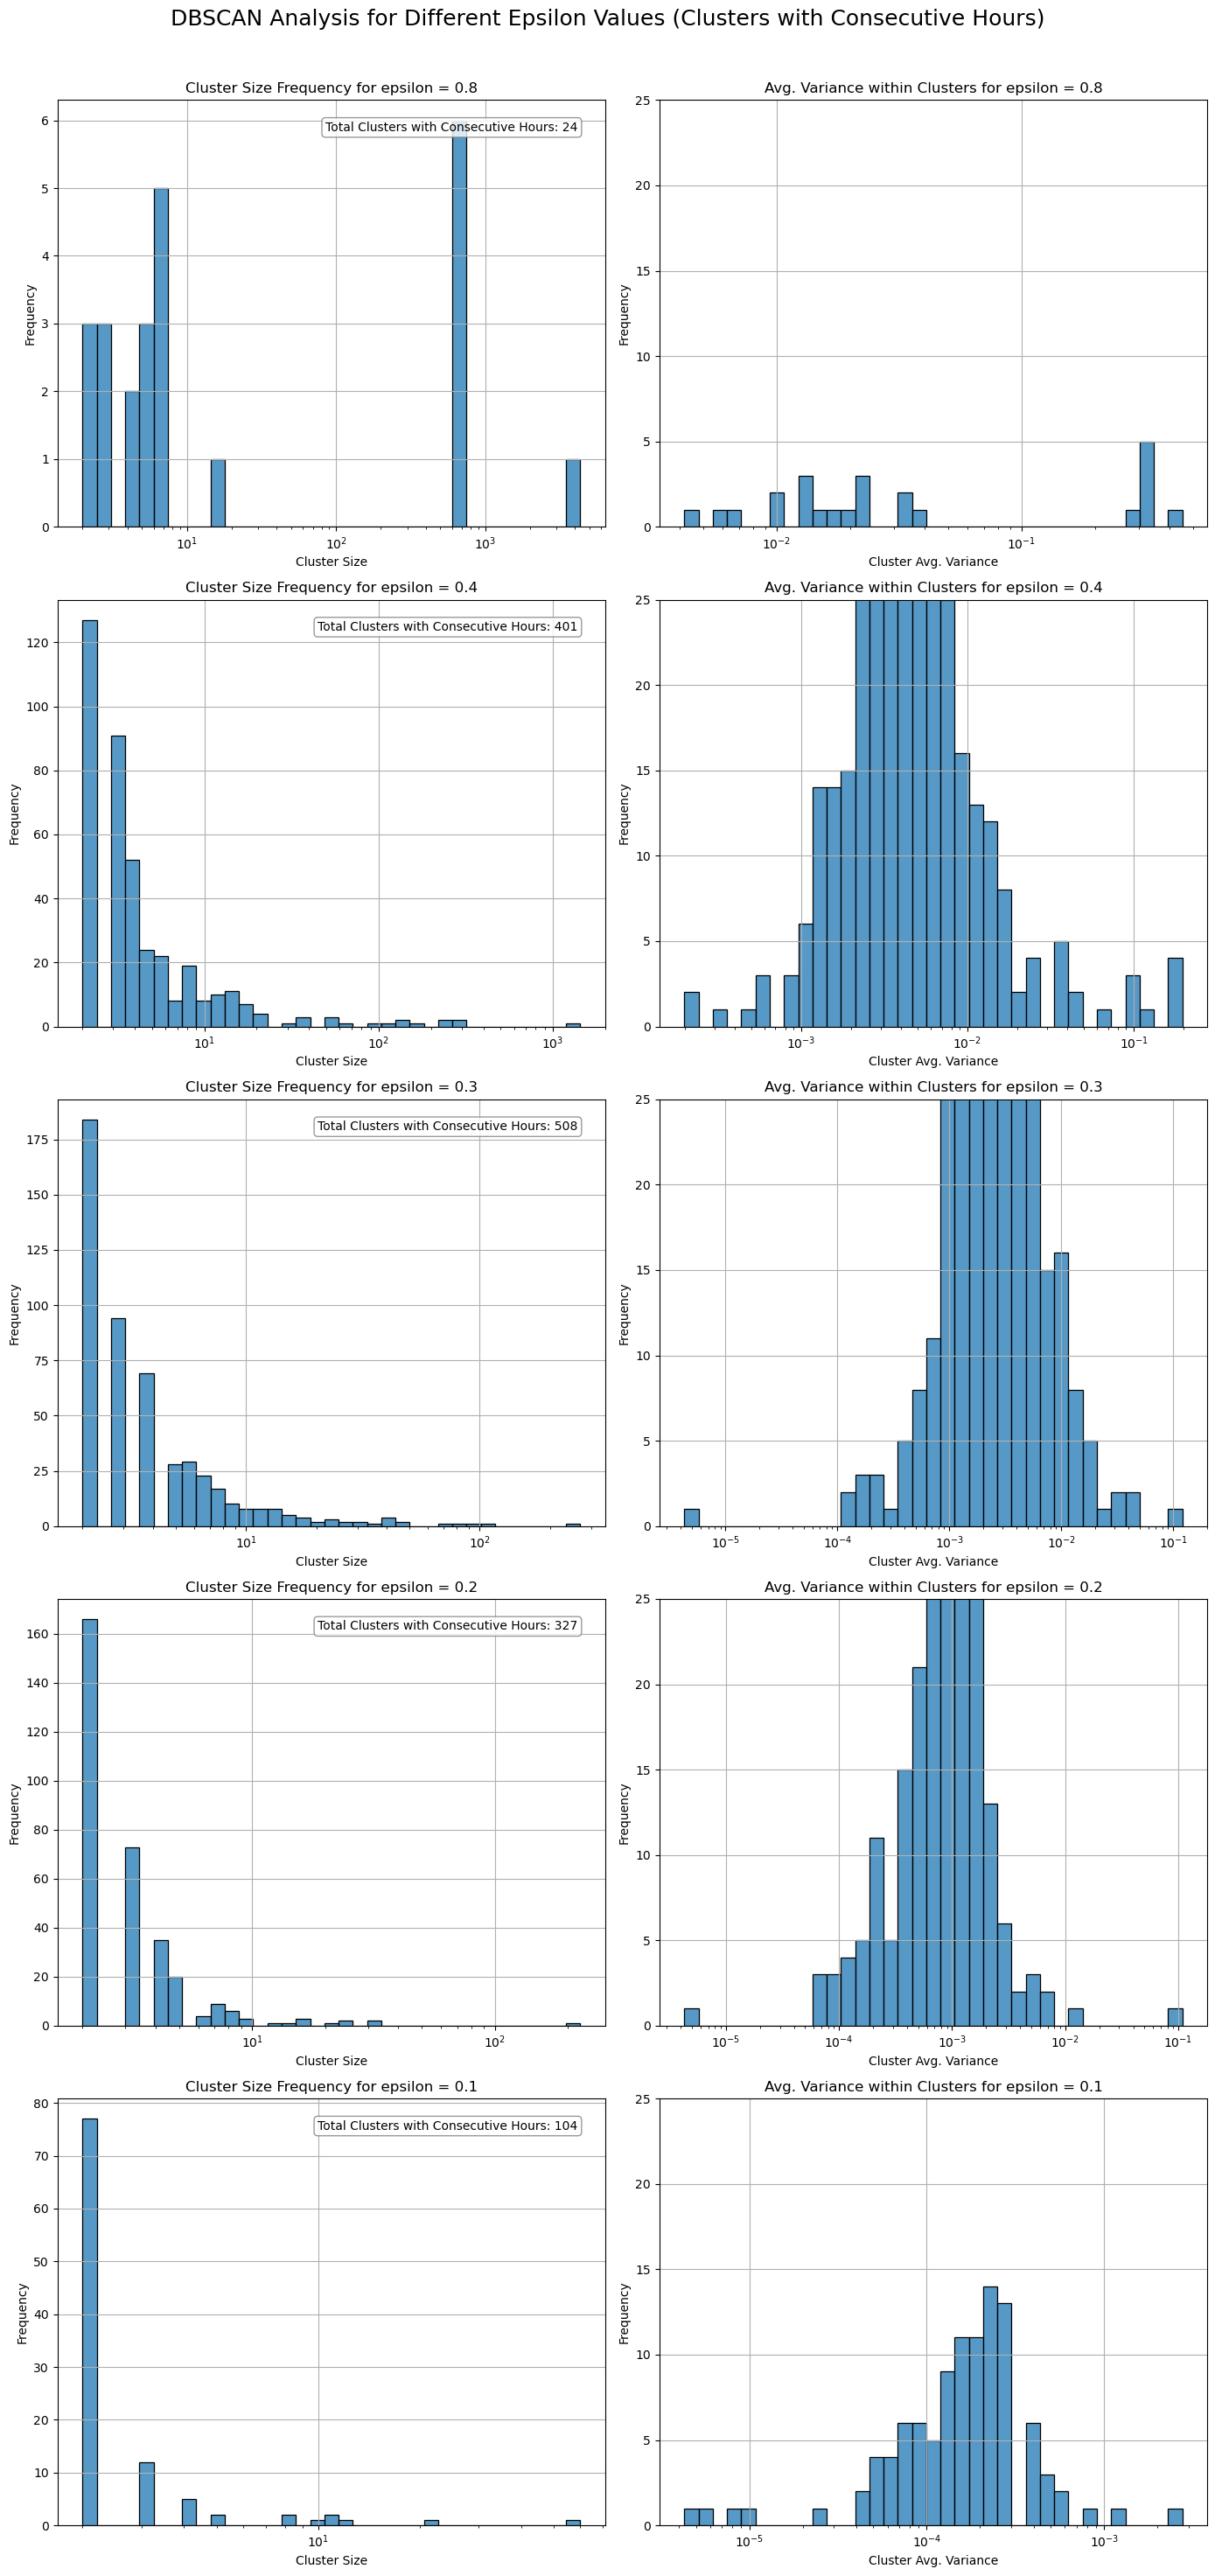

In [11]:
"""
Plot size and Avg. Variance distribution of clusters containing at least one set of consecutive hours
- Using DBSCAN results
"""

# Initialize list to store results and DataFrames for each epsilon
epsilon_results = []
consecutive_hours_dfs = {}

# Epsilon values to test
epsilon_values = [0.8, 0.4, 0.3, 0.2, 0.1]

# Prepare the figure with 5 rows and 2 columns
fig, axes = plt.subplots(5, 2, figsize=(14, 30))
fig.suptitle('DBSCAN Analysis for Different Epsilon Values (Clusters with Consecutive Hours)', fontsize=18)

# Define a common y-axis limit for variance plots on the right
common_y_axis_limit = [0, 25]

for idx, eps in enumerate(epsilon_values):
    labels = df_tot_eps[eps]['Cluster']
    
    # Create a DataFrame to store clustering results for this epsilon
    df_epsilon = df_tot_normalized_df.copy()
    df_epsilon['Cluster'] = labels
    
    # Identify clusters with at least one consecutive pair of hours
    clusters_with_consec_h = []
    consecutive_rows = []
    for label in set(labels):
        if label != -1:
            cluster_group = df_tot_eps[eps][df_tot_eps[eps]['Cluster'] == label]
            consecutive_indices = []

            for i in range(len(cluster_group) - 1):
                if cluster_group['Time_Index'].iloc[i] + 1 == cluster_group['Time_Index'].iloc[i + 1]:
                    consecutive_indices.append(cluster_group.index[i])
                    if (i <= len(cluster_group)-3) and (not (cluster_group['Time_Index'].iloc[i+1] + 1 == cluster_group['Time_Index'].iloc[i + 2])):
                        consecutive_indices.append(cluster_group.index[i+1])

                    if i == len(cluster_group) - 2:
                        consecutive_indices.append(cluster_group.index[i + 1])

            if consecutive_indices:
                clusters_with_consec_h.append(label)
                consecutive_rows.extend(consecutive_indices)

    df_consecutive = df_tot_eps[eps].loc[consecutive_rows].copy()
    consecutive_hours_dfs[eps] = df_consecutive

    df_epsilon_cluster_w_consec_h = df_epsilon[df_epsilon['Cluster'].isin(clusters_with_consec_h)]
    cluster_sizes = df_epsilon_cluster_w_consec_h['Cluster'].value_counts()
    cluster_variances = df_epsilon_cluster_w_consec_h.groupby('Cluster').var().mean(axis=1)

    # Plot Cluster Size Frequency
    sns.histplot(cluster_sizes, kde=False, bins=35, ax=axes[idx, 0], log_scale=(True, False))
    axes[idx, 0].set_title(f'Cluster Size Frequency for epsilon = {eps}', fontsize=12)
    axes[idx, 0].set_xlabel('Cluster Size')
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].grid(True)
    total_clusters = len(cluster_sizes)
    axes[idx, 0].text(
        0.95, 0.95,
        f'Total Clusters with Consecutive Hours: {total_clusters}',
        transform=axes[idx, 0].transAxes,
        fontsize=10,
        color='black',
        ha='right',
        va='top',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.8)
    )

    # Plot Cluster Variance Frequency with a fixed y-axis limit
    sns.histplot(cluster_variances, kde=False, bins=35, ax=axes[idx, 1], log_scale=(True, False))
    axes[idx, 1].set_title(f'Avg. Variance within Clusters for epsilon = {eps}', fontsize=12)
    axes[idx, 1].set_xlabel('Cluster Avg. Variance')
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].set_ylim(common_y_axis_limit)  # Set the common y-axis limit here
    axes[idx, 1].grid(True)

    # Store the results for each epsilon
    result = {
        'Epsilon': eps,
        'Num_Clusters_With_Consecutive_Hours': len(cluster_sizes),
        'Mean_Cluster_Variance': cluster_variances.mean()
    }
    epsilon_results.append(result)

# Adjust layout and show the figure
plt.tight_layout(rect=[0, 0, 1, 0.97])


# Trial of merging input data

In [12]:
"""
Plot size and Avg. Variance distribution of clusters containing at least one set of consecutive hours
- Using DBSCAN results
"""
import itertools

# Initialize list to store results and DataFrames for each epsilon
epsilon_results = []
consecutive_hours_dfs = {}
size_set_consecutive_indices ={} # for each eps the how many consecutive hours within each set
# Epsilon values to test
epsilon_values = [0.8, 0.4, 0.3, 0.2, 0.1]

for idx, eps in enumerate(epsilon_values):
    labels = df_tot_eps[eps]['Cluster']
    
    # Create a DataFrame to store clustering results for this epsilon
    df_epsilon = df_tot_normalized_df.copy()
    df_epsilon['Cluster'] = labels
    
    # Identify clusters with at least one consecutive pair of hours
    clusters_with_consec_h = []
    consecutive_rows = []
    set_consecutive_indices_size_eps = []
    row_indexes_to_drop = []

    for label in set(labels):
        if label != -1:
            cluster_group = df_tot_eps[eps][df_tot_eps[eps]['Cluster'] == label]
            cluster_group = cluster_group.sort_values(by="Time_Index", ascending=True) #Make sure data is ordered in an ascending order based on the Time_Index value

            # ############# DEBUGGING #############
            # print("cluster greoup")
            # print(cluster_group)
            # #####################################

            consecutive_indices_cluster = [] # cluster_groupAll sets of consecutive indices within the same cluster
            index_consecutive_indices_to_merge = [] # df_tot index of one set of consecutuve indices within the same cluster

            for i in range(len(cluster_group) - 1):
                if cluster_group['Time_Index'].iloc[i] + 1 == cluster_group['Time_Index'].iloc[i + 1]:
                    consecutive_indices_cluster.append(cluster_group.index[i])
                    index_consecutive_indices_to_merge.append(cluster_group.iloc[i, :]["Time_Index"] - 1)

                    if (i <= len(cluster_group)-3) and (not (cluster_group['Time_Index'].iloc[i+1] + 1 == cluster_group['Time_Index'].iloc[i + 2])):
                        consecutive_indices_cluster.append(cluster_group.index[i+1])
                        index_consecutive_indices_to_merge.append(cluster_group.index[i+1])
                        set_consecutive_indices_size_eps.append(len(index_consecutive_indices_to_merge))

                        # Replace data from sets of consecutive hours with average values
                        mean_row = df_tot_eps[eps].iloc[index_consecutive_indices_to_merge].mean()
                        mean_row["Rel_TimeStep"] = len(index_consecutive_indices_to_merge)
                        index_row_to_keep = index_consecutive_indices_to_merge[0]
                        df_tot_eps[eps].loc[index_row_to_keep] = mean_row

                        #Update the list of rows to remove as these rows are replaced by the average values across them
                        index_row_to_remove = index_consecutive_indices_to_merge[1:]
                        row_indexes_to_drop.append(index_row_to_remove)

                        # print("Printing time indexes for this set of consecutive hours within the same cluster")
                        # print(index_consecutive_indices_to_merge)
                        # print(df_tot_eps[eps].iloc[index_consecutive_indices_to_merge, :])

                        index_consecutive_indices_to_merge = []

                    if i == len(cluster_group) - 2:
                        consecutive_indices_cluster.append(cluster_group.index[i + 1])
                        index_consecutive_indices_to_merge.append(cluster_group.index[i+1])
                        set_consecutive_indices_size_eps.append(len(index_consecutive_indices_to_merge))

                        # Replace data from sets of consecutive hours with average values
                        mean_row = df_tot_eps[eps].iloc[index_consecutive_indices_to_merge].mean()
                        mean_row["Rel_TimeStep"] = len(index_consecutive_indices_to_merge)
                        index_row_to_keep = index_consecutive_indices_to_merge[0]
                        df_tot_eps[eps].loc[index_row_to_keep] = mean_row

                        #Update the list of rows to remove as these rows are replaced by the average values across them
                        index_row_to_remove = index_consecutive_indices_to_merge[1:]
                        row_indexes_to_drop.append(index_row_to_remove)

                        # print(index_consecutive_indices_to_merge)
                        # print(df_tot_eps[eps].iloc[index_consecutive_indices_to_merge, :])

                        index_consecutive_indices_to_merge = []

            if consecutive_indices_cluster:
                clusters_with_consec_h.append(label)
                consecutive_rows.extend(consecutive_indices_cluster)

    # Remove all rows that were replaced by the average value of the set of consecutive hours within the same cluster
    row_indexes_to_drop = list(itertools.chain(*row_indexes_to_drop))
    df_tot_eps[eps].drop(row_indexes_to_drop, inplace=True)
    df_tot_eps[eps]["Time_Index"] = range(1, len(df_tot_eps[eps])+1, 1)

    size_set_consecutive_indices[eps] = set_consecutive_indices_size_eps
    consecutive_hours_dfs[eps] = df_consecutive

    df_epsilon_cluster_w_consec_h = df_epsilon[df_epsilon['Cluster'].isin(clusters_with_consec_h)]
    cluster_sizes = df_epsilon_cluster_w_consec_h['Cluster'].value_counts()
    cluster_variances = df_epsilon_cluster_w_consec_h.groupby('Cluster').var().mean(axis=1)



C:\Users\Diego\AppData\Local\Temp\ipykernel_4976\701711343.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tot_eps[eps].loc[index_row_to_keep] = mean_row
C:\Users\Diego\AppData\Local\Temp\ipykernel_4976\701711343.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7268.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tot_eps[eps].loc[index_row_to_keep] = mean_row
C:\Users\Diego\AppData\Local\Temp\ipykernel_4976\701711343.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2075.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tot_eps[eps].loc[index_row_to_keep] = mean_row
C:\User

Interesting plots:
- size of df_tot_eps acros different epsilons
  - make a difference between many times small amount of hours merged or few times huges amounts of data merged
  - therefore plot the number of times rows were merged (len (size_set_consecutive_indices[eps])) and how many rows were merged every time, did we take the mean over 2 or 55 row, see set_consecutive_indices_size_eps (size_set_consecutive_indices[eps])in a box plot for each epsilon 

In [13]:
df_tot_eps[0.2]

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3,index,CT_NG,ME_NG,MA_NG,MA_natural_gas_combined_cycle,MA_solar_pv,CT_natural_gas_combined_cycle,CT_onshore_wind,CT_solar_pv,ME_natural_gas_combined_cycle,ME_onshore_wind,MA_battery,CT_battery,ME_battery,Cluster
0,1,7850.0,2242.0,1070.0,1.0,5.45,5.45,5.28,1,0.0,1,0.569945,0.0,1,0.920104,1,1,1,-1
1,2,7424.0,2120.0,1012.0,2.0,5.45,5.45,5.28,1,0.0,1,0.623259,0.0,1,0.882234,1,1,1,-1
2,3,7027.0,2006.5,958.0,3.5,5.45,5.45,5.28,1,0.0,1,0.670794,0.0,1,0.884062,1,1,1,0
4,4,6922.0,1977.0,944.0,5.0,5.45,5.45,5.28,1,0.0,1,0.381774,0.0,1,0.831012,1,1,1,-1
5,5,7045.0,2012.0,960.0,6.0,5.45,5.45,5.28,1,0.0,1,0.244583,0.0,1,0.776542,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,7928,9923.0,3797.0,1339.0,8756.0,3.78,3.78,4.28,1,0.0,1,0.305530,0.0,1,0.566416,1,1,1,-1
8756,7929,9461.0,3621.0,1277.0,8757.0,3.78,3.78,4.28,1,0.0,1,0.445488,0.0,1,0.595832,1,1,1,-1
8757,7930,9018.0,3452.0,1217.0,8758.0,3.78,3.78,4.28,1,0.0,1,0.304045,0.0,1,0.735717,1,1,1,-1
8758,7931,8551.0,3281.0,1154.0,8759.0,3.78,3.78,4.28,1,0.0,1,0.617811,0.0,1,0.773956,1,1,1,-1


## Testing 

In [14]:
df_tot_eps[0.3].iloc[0:20, :]

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3,index,CT_NG,ME_NG,MA_NG,MA_natural_gas_combined_cycle,MA_solar_pv,CT_natural_gas_combined_cycle,CT_onshore_wind,CT_solar_pv,ME_natural_gas_combined_cycle,ME_onshore_wind,MA_battery,CT_battery,ME_battery,Cluster
0,1,7850.0,2242.0,1070.0,1.0,5.45,5.45,5.28,1,0.0000,1,0.569945,0.0000,1,0.920104,1,1,1,0
1,2,7424.0,2120.0,1012.0,2.0,5.45,5.45,5.28,1,0.0000,1,0.623259,0.0000,1,0.882234,1,1,1,-1
2,3,7027.0,2006.5,958.0,3.5,5.45,5.45,5.28,1,0.0000,1,0.670794,0.0000,1,0.884062,1,1,1,1
4,4,6922.0,1977.0,944.0,5.0,5.45,5.45,5.28,1,0.0000,1,0.381774,0.0000,1,0.831012,1,1,1,-1
5,5,7045.0,2012.0,960.0,6.0,5.45,5.45,5.28,1,0.0000,1,0.244583,0.0000,1,0.776542,1,1,1,-1
6,6,7307.0,2087.0,996.0,7.0,5.45,5.45,5.28,1,0.0000,1,0.293397,0.0000,1,0.704863,1,1,1,-1
7,7,7544.0,2154.0,1029.0,8.0,5.45,5.45,5.28,1,0.0000,1,0.378603,0.0000,1,0.647961,1,1,1,-1
8,8,7946.0,2269.0,1083.0,9.0,5.45,5.45,5.28,1,0.1779,1,0.329338,0.2003,1,0.526325,1,1,1,-1
9,9,8340.0,2382.0,1137.0,10.0,5.45,5.45,5.28,1,0.4290,1,0.000015,0.4221,1,0.079201,1,1,1,-1
10,10,8578.0,2449.0,1169.0,11.0,5.45,5.45,5.28,1,0.5748,1,0.000046,0.5774,1,0.025011,1,1,1,-1


In [15]:
import itertools

## Verify on a smaller number of rows how the accuracy of the data modification post-DBSCAN processing
eps = 0.3
df_tot_eps[0.3] = df_tot_eps[0.3].iloc[0:20, :]

labels = df_tot_eps[eps]['Cluster']

# Identify clusters with at least one consecutive pair of hours
clusters_with_consec_h = []
consecutive_rows = []
set_consecutive_indices_size_eps = []
row_indexes_to_drop = []

############# DEBUGGING #############
labels = [1]
#####################################

for label in set(labels):
    if label != -1:
        cluster_group = df_tot_eps[eps][df_tot_eps[eps]['Cluster'] == label]
        cluster_group = cluster_group.sort_values(by="Time_Index", ascending=True) #Make sure data is ordered in an ascending order based on the Time_Index value

        # ############# DEBUGGING #############
        # print("cluster greoup")
        # print(cluster_group)
        # #####################################

        consecutive_indices_cluster = [] # cluster_groupAll sets of consecutive indices within the same cluster
        index_consecutive_indices_to_merge = [] # df_tot index of one set of consecutuve indices within the same cluster

        for i in range(len(cluster_group) - 1):
            if cluster_group['Time_Index'].iloc[i] + 1 == cluster_group['Time_Index'].iloc[i + 1]:
                print("Enter Loop of concescutive time indexes")
                consecutive_indices_cluster.append(cluster_group.index[i])
                index_consecutive_indices_to_merge.append(cluster_group.iloc[i, :]["Time_Index"] - 1)

                if (i <= len(cluster_group)-3) and (not (cluster_group['Time_Index'].iloc[i+1] + 1 == cluster_group['Time_Index'].iloc[i + 2])):
                    consecutive_indices_cluster.append(cluster_group.index[i+1])
                    index_consecutive_indices_to_merge.append(cluster_group.index[i+1])
                    set_consecutive_indices_size_eps.append(len(index_consecutive_indices_to_merge))

                    ############# DEBUGGING #############
                    print("Rows of consecutive indices to merge")
                    print(df_tot_eps[eps].iloc[index_consecutive_indices_to_merge])
                    #####################################

                    # Replace data from sets of consecutive hours with average values
                    mean_row = df_tot_eps[eps].iloc[index_consecutive_indices_to_merge].mean()
                    mean_row["Rel_TimeStep"] = len(index_consecutive_indices_to_merge)
                    index_row_to_keep = index_consecutive_indices_to_merge[0]
                    df_tot_eps[eps].loc[index_row_to_keep] = mean_row

                    #Update the list of rows to remove as these rows are replaced by the average values across them
                    index_row_to_remove = index_consecutive_indices_to_merge[1:]
                    row_indexes_to_drop.append(index_row_to_remove)

                    # print("Printing time indexes for this set of consecutive hours within the same cluster")
                    # print(index_consecutive_indices_to_merge)
                    # print(df_tot_eps[eps].iloc[index_consecutive_indices_to_merge, :])

                    index_consecutive_indices_to_merge = []

                if i == len(cluster_group) - 2:
                    consecutive_indices_cluster.append(cluster_group.index[i + 1])
                    index_consecutive_indices_to_merge.append(cluster_group.index[i+1])
                    set_consecutive_indices_size_eps.append(len(index_consecutive_indices_to_merge))


                    ############# DEBUGGING #############
                    print("Rows of consecutive indices to merge")
                    print(index_consecutive_indices_to_merge)
                    #####################################

                    # Replace data from sets of consecutive hours with average values
                    mean_row = df_tot_eps[eps].iloc[index_consecutive_indices_to_merge].mean()
                    mean_row["Rel_TimeStep"] = len(index_consecutive_indices_to_merge)
                    index_row_to_keep = index_consecutive_indices_to_merge[0]
                    df_tot_eps[eps].loc[index_row_to_keep] = mean_row

                    #Update the list of rows to remove as these rows are replaced by the average values across them
                    index_row_to_remove = index_consecutive_indices_to_merge[1:]
                    row_indexes_to_drop.append(index_row_to_remove)

                    # print(index_consecutive_indices_to_merge)
                    # print(df_tot_eps[eps].iloc[index_consecutive_indices_to_merge, :])

                    index_consecutive_indices_to_merge = []

        if consecutive_indices_cluster:
            clusters_with_consec_h.append(label)
            consecutive_rows.extend(consecutive_indices_cluster)
row_indexes_to_drop = list(itertools.chain(*row_indexes_to_drop))
df_tot_eps[eps].drop(row_indexes_to_drop, inplace=True)
df_tot_eps[eps]["Time_Index"] = range(1, len(df_tot_eps[eps])+1, 1)


size_set_consecutive_indices[eps] = set_consecutive_indices_size_eps
consecutive_hours_dfs[eps] = df_consecutive

df_epsilon_cluster_w_consec_h = df_epsilon[df_epsilon['Cluster'].isin(clusters_with_consec_h)]
cluster_sizes = df_epsilon_cluster_w_consec_h['Cluster'].value_counts()
cluster_variances = df_epsilon_cluster_w_consec_h.groupby('Cluster').var().mean(axis=1)


In [16]:
df_tot_eps[eps]["Time_Index"] = range(1, len(df_tot_eps[eps])+1, 1)
df_tot_eps[eps]

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3,index,CT_NG,ME_NG,MA_NG,MA_natural_gas_combined_cycle,MA_solar_pv,CT_natural_gas_combined_cycle,CT_onshore_wind,CT_solar_pv,ME_natural_gas_combined_cycle,ME_onshore_wind,MA_battery,CT_battery,ME_battery,Cluster
0,1,7850.0,2242.0,1070.0,1.0,5.45,5.45,5.28,1,0.0000,1,0.569945,0.0000,1,0.920104,1,1,1,0
1,2,7424.0,2120.0,1012.0,2.0,5.45,5.45,5.28,1,0.0000,1,0.623259,0.0000,1,0.882234,1,1,1,-1
2,3,7027.0,2006.5,958.0,3.5,5.45,5.45,5.28,1,0.0000,1,0.670794,0.0000,1,0.884062,1,1,1,1
4,4,6922.0,1977.0,944.0,5.0,5.45,5.45,5.28,1,0.0000,1,0.381774,0.0000,1,0.831012,1,1,1,-1
5,5,7045.0,2012.0,960.0,6.0,5.45,5.45,5.28,1,0.0000,1,0.244583,0.0000,1,0.776542,1,1,1,-1
6,6,7307.0,2087.0,996.0,7.0,5.45,5.45,5.28,1,0.0000,1,0.293397,0.0000,1,0.704863,1,1,1,-1
7,7,7544.0,2154.0,1029.0,8.0,5.45,5.45,5.28,1,0.0000,1,0.378603,0.0000,1,0.647961,1,1,1,-1
8,8,7946.0,2269.0,1083.0,9.0,5.45,5.45,5.28,1,0.1779,1,0.329338,0.2003,1,0.526325,1,1,1,-1
9,9,8340.0,2382.0,1137.0,10.0,5.45,5.45,5.28,1,0.4290,1,0.000015,0.4221,1,0.079201,1,1,1,-1
10,10,8578.0,2449.0,1169.0,11.0,5.45,5.45,5.28,1,0.5748,1,0.000046,0.5774,1,0.025011,1,1,1,-1


In [17]:
row_indexes_to_drop

[]

In [18]:
cluster_group

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3,index,CT_NG,ME_NG,MA_NG,MA_natural_gas_combined_cycle,MA_solar_pv,CT_natural_gas_combined_cycle,CT_onshore_wind,CT_solar_pv,ME_natural_gas_combined_cycle,ME_onshore_wind,MA_battery,CT_battery,ME_battery,Cluster
2,3,7027.0,2006.5,958.0,3.5,5.45,5.45,5.28,1,0.0,1,0.670794,0.0,1,0.884062,1,1,1,1


In [19]:
for i in range(len(cluster_group) - 1):
    print(i)

In [20]:
index_consecutive_indices_to_merge

[]

In [21]:
df_tot_eps[0.3]

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3,index,CT_NG,ME_NG,MA_NG,MA_natural_gas_combined_cycle,MA_solar_pv,CT_natural_gas_combined_cycle,CT_onshore_wind,CT_solar_pv,ME_natural_gas_combined_cycle,ME_onshore_wind,MA_battery,CT_battery,ME_battery,Cluster
0,1,7850.0,2242.0,1070.0,1.0,5.45,5.45,5.28,1,0.0000,1,0.569945,0.0000,1,0.920104,1,1,1,0
1,2,7424.0,2120.0,1012.0,2.0,5.45,5.45,5.28,1,0.0000,1,0.623259,0.0000,1,0.882234,1,1,1,-1
2,3,7027.0,2006.5,958.0,3.5,5.45,5.45,5.28,1,0.0000,1,0.670794,0.0000,1,0.884062,1,1,1,1
4,4,6922.0,1977.0,944.0,5.0,5.45,5.45,5.28,1,0.0000,1,0.381774,0.0000,1,0.831012,1,1,1,-1
5,5,7045.0,2012.0,960.0,6.0,5.45,5.45,5.28,1,0.0000,1,0.244583,0.0000,1,0.776542,1,1,1,-1
6,6,7307.0,2087.0,996.0,7.0,5.45,5.45,5.28,1,0.0000,1,0.293397,0.0000,1,0.704863,1,1,1,-1
7,7,7544.0,2154.0,1029.0,8.0,5.45,5.45,5.28,1,0.0000,1,0.378603,0.0000,1,0.647961,1,1,1,-1
8,8,7946.0,2269.0,1083.0,9.0,5.45,5.45,5.28,1,0.1779,1,0.329338,0.2003,1,0.526325,1,1,1,-1
9,9,8340.0,2382.0,1137.0,10.0,5.45,5.45,5.28,1,0.4290,1,0.000015,0.4221,1,0.079201,1,1,1,-1
10,10,8578.0,2449.0,1169.0,11.0,5.45,5.45,5.28,1,0.5748,1,0.000046,0.5774,1,0.025011,1,1,1,-1


In [22]:
cluster_group

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3,index,CT_NG,ME_NG,MA_NG,MA_natural_gas_combined_cycle,MA_solar_pv,CT_natural_gas_combined_cycle,CT_onshore_wind,CT_solar_pv,ME_natural_gas_combined_cycle,ME_onshore_wind,MA_battery,CT_battery,ME_battery,Cluster
2,3,7027.0,2006.5,958.0,3.5,5.45,5.45,5.28,1,0.0,1,0.670794,0.0,1,0.884062,1,1,1,1


In [23]:
list(set(labels))

[1]

In [24]:
mean_row["Time_Index"]

8730.5

In [25]:
test = [1, 2, 3]
df_test = pd.DataFrame(test)
test[1:]
df_test.drop(index=[1,2], inplace=True)
df_test

,0
0,1


In [26]:
index_consecutive_indices_to_merge

[]

In [27]:
cluster_group

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3,index,CT_NG,ME_NG,MA_NG,MA_natural_gas_combined_cycle,MA_solar_pv,CT_natural_gas_combined_cycle,CT_onshore_wind,CT_solar_pv,ME_natural_gas_combined_cycle,ME_onshore_wind,MA_battery,CT_battery,ME_battery,Cluster
2,3,7027.0,2006.5,958.0,3.5,5.45,5.45,5.28,1,0.0,1,0.670794,0.0,1,0.884062,1,1,1,1


In [28]:
cluster_group.mean()

Time_Index                          3.000000
Demand_MW_z1                     7027.000000
Demand_MW_z2                     2006.500000
Demand_MW_z3                      958.000000
index                               3.500000
CT_NG                               5.450000
ME_NG                               5.450000
MA_NG                               5.280000
MA_natural_gas_combined_cycle       1.000000
MA_solar_pv                         0.000000
CT_natural_gas_combined_cycle       1.000000
CT_onshore_wind                     0.670794
CT_solar_pv                         0.000000
ME_natural_gas_combined_cycle       1.000000
ME_onshore_wind                     0.884062
MA_battery                          1.000000
CT_battery                          1.000000
ME_battery                          1.000000
Cluster                             1.000000
dtype: float64

In [29]:
import pandas as pd

# Example DataFrame
data = {
    'Column1': [1.0, 2.0, 3.0, 4.0, 5.0],
    'Column2': [6.0, 7.0, 8.0, 9.0, 10.0],
    'Column3': [11.0, 12.0, 13.0, 14.0, 15.0]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Compute the mean of rows 2 and 3 (index 1 and 2)
mean_row = df.iloc[[1,2]].mean()

df = df.drop(index=2)

df.iloc[2]

# # Replace row 2 (index 1) with the mean
# df.iloc[1] = mean_row

# # Remove row 3 (index 2)

# print("\nUpdated DataFrame:")
# print(df)


Original DataFrame:
   Column1  Column2  Column3
0      1.0      6.0     11.0
1      2.0      7.0     12.0
2      3.0      8.0     13.0
3      4.0      9.0     14.0
4      5.0     10.0     15.0


Column1     4.0
Column2     9.0
Column3    14.0
Name: 3, dtype: float64

In [30]:
np.mean(size_set_consecutive_indices[0.8])

65.8473282442748

In [31]:
consecutive_indices_cluster

[]

In [32]:
cluster_group.iloc[4, :]["Time_Index"]

IndexError: single positional indexer is out-of-bounds

In [ ]:
cluster_group